# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import general packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime

Import YLXPS-related packages

In [4]:
import sys 
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/')
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/analysis/')
import StandMonitor
import WaveformClass as Wvf
import HelperClasses as HelpC
import RunAnalysis as An
import PlotFunctions as Plt

# Data Read-In

In [10]:
FilePath = '/project/fas/david_moore/zl423/PurityData/20200904/'

In [11]:
Files = sorted(glob.glob(FilePath+'Vacuum*'))

In [12]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [13]:
arg = Namespace(filepath=Files, dirpath=None, txt=False, show=True)

# Analysis

In [14]:
print(Files)

['/project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_1.h5']


## Argon Measurement
Took data this morning for an extended period of time to check the consistency of the data between today and yesterday. Argon was left in the chamber from previous day. See Jupyter notebook from 20200903 for comparison. 

In [15]:
ch1 = Wvf.WFM(ID=1, Pol=1)
ch2 = Wvf.WFM(ID=2, Pol=-1)
channels = [ch1, ch2]

FileNames, Method = An.ChooseFilesToAnalyze(arg)
for File in FileNames: 
    An.ImportDataFromHDF5(File, channels)

An.DoAnalysis(channels)

 | Filename... /project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_1.h5
 | Number of files in ch1...	 914/914
 | Number of files in ch2...	 914/914
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  21.125304485 sec


In [20]:
ChargeCollection = ch1.Max / ch2.Max
DiffMinute = int((np.max(ch1.TimeStamp) - np.min(ch1.TimeStamp)).seconds/60.0 + 0.5)
XTicks = int((DiffMinute/12.0 + 0.5))+1
print(np.mean(ChargeCollection))

1.0004038859552797


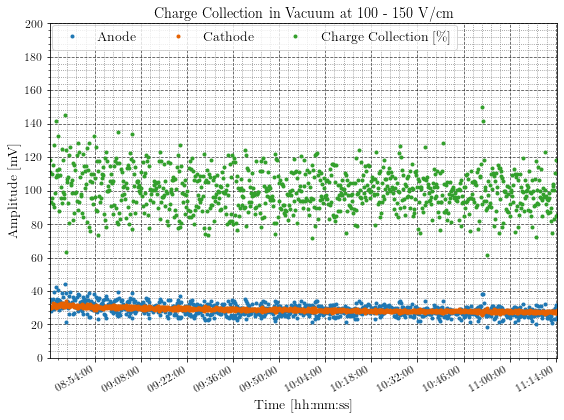

In [18]:
Plt.PltTime(Time=ch1.TimeStamp,
            Data=[ch1.Max,ch2.Max,ChargeCollection*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks,
            YTicks=20,
            YRange=[0,200],
            SaveName='amp_ratio',
            Title='Charge Collection in Vacuum at 100 - 150 V/cm',
            Save=False)
# plt.savefig('amp.pdf', bbox_inches='tight')

## Vacuum Gas Measurement
Replace fiber with completely new one from Thorlabs. Used Ruby scribe method to cleave the fiber. Light looks visually contained, i.e. looking at the fiber from the side one can see very little light meaning that the cut is clean and little light is diffusively reflecting off to all sides. 

In [46]:
Files2 = sorted(glob.glob(FilePath+'Vacuum*'))
print(Files2)
arg2 = Namespace(filepath=Files2, dirpath=None, txt=False, show=True)

ch3 = Wvf.WFM(ID=1, Pol=1)
ch4 = Wvf.WFM(ID=2, Pol=-1)
channels2 = [ch3, ch4]

FileNames2, Method = An.ChooseFilesToAnalyze(arg2)
for File in FileNames2: 
    An.ImportDataFromHDF5(File, channels2)

An.DoAnalysis(channels2)

['/project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_10.h5', '/project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_8.h5', '/project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_9.h5']
 | Filename... /project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_10.h5
 | Number of files in ch1...	 11/11
 | Number of files in ch2...	 11/11
 | Filename... /project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_8.h5
 | Number of files in ch1...	 19/30
 | Number of files in ch2...	 19/30
 | Filename... /project/fas/david_moore/zl423/PurityData/20200904/Vacuum_Au-Thorslabs_2cm_C-100V_A-100V_9.h5
 | Number of files in ch1...	 23/53
 | Number of files in ch2...	 23/53
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  58.147048474 sec


In [47]:
ChargeCollection2 = ch3.Max / ch4.Max
DiffMinute2 = int((np.max(ch3.TimeStamp) - np.min(ch3.TimeStamp)).seconds/60.0 + 0.5)
XTicks2 = int((DiffMinute2/12.0 + 0.5))+1

In [48]:
print(np.mean(ChargeCollection2))

1.705753621431768


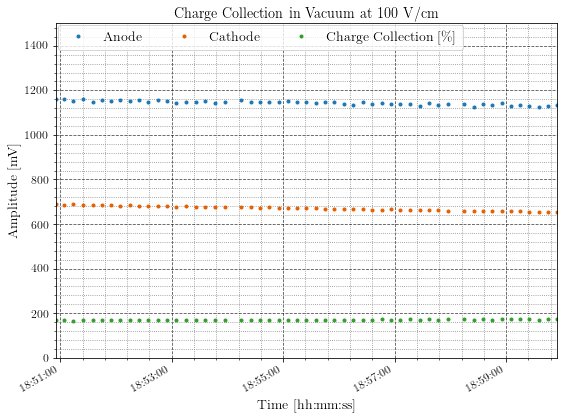

In [49]:
Plt.PltTime(Time=ch3.TimeStamp,
            Data=[ch3.Max,ch4.Max,ChargeCollection2*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks2,
            YTicks=200,
            YRange=[0,1500],
            SaveName='amp_ratio',
            Title='Charge Collection in Vacuum at 100 V/cm',
            Save=False)

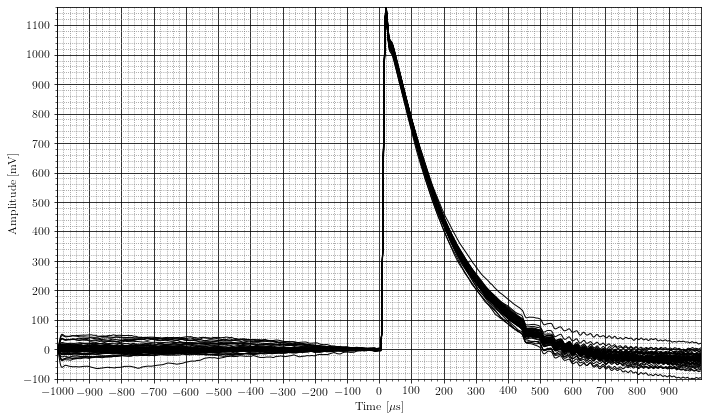

In [50]:
Plt.PltWfm(Time=ch3.Time,
           Data=list(ch3.AmpClean),
           Legend=['Anode'],
           XTicks=100,
           YTicks=100,
           SaveName='avg_waveform',
           Color='k')

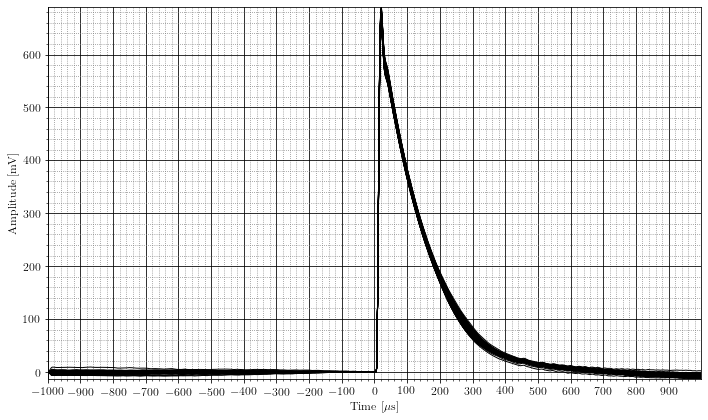

In [51]:
Plt.PltWfm(Time=ch4.Time,
           Data=list(ch4.AmpClean),
           Legend=['Cathode'],
           XTicks=100,
           YTicks=100,
           SaveName='avg_waveform',
           Color='k')

In [58]:
Files3 = sorted(glob.glob(FilePath+'GAr_2*'))
print(Files3)
arg3 = Namespace(filepath=Files3, dirpath=None, txt=False, show=True)

ch5 = Wvf.WFM(ID=1, Pol=1)
ch6 = Wvf.WFM(ID=2, Pol=-1)
channels3 = [ch5, ch6]

FileNames3, Method = An.ChooseFilesToAnalyze(arg3)
for File in FileNames3: 
    An.ImportDataFromHDF5(File, channels3)

An.DoAnalysis(channels3)

ChargeCollection3 = ch5.Max / ch6.Max
DiffMinute3 = int((np.max(ch5.TimeStamp) - np.min(ch5.TimeStamp)).seconds/60.0 + 0.5)
XTicks3 = int((DiffMinute3/12.0 + 0.5))+1

print(np.mean(ChargeCollection3))

['/project/fas/david_moore/zl423/PurityData/20200904/GAr_2_Au-Thorslabs_2cm_C-100V_A-100V_1.h5', '/project/fas/david_moore/zl423/PurityData/20200904/GAr_2_Au-Thorslabs_2cm_C-100V_A-100V_2.h5']
 | Filename... /project/fas/david_moore/zl423/PurityData/20200904/GAr_2_Au-Thorslabs_2cm_C-100V_A-100V_1.h5
 | Number of files in ch1...	 14/14
 | Number of files in ch2...	 14/14
 | Filename... /project/fas/david_moore/zl423/PurityData/20200904/GAr_2_Au-Thorslabs_2cm_C-100V_A-100V_2.h5
 | Number of files in ch1...	 20/34
 | Number of files in ch2...	 20/34
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  70.236792815 sec
0.9701186548506381


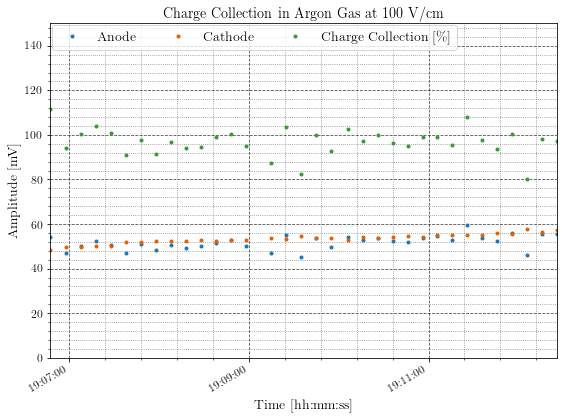

In [57]:
Plt.PltTime(Time=ch5.TimeStamp,
            Data=[ch5.Max,ch6.Max,ChargeCollection3*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks3,
            YTicks=20,
            YRange=[0,150],
            SaveName='amp_ratio',
            Title='Charge Collection in Argon Gas at 100 V/cm',
            Save=False)
plt.savefig('20200904_argon_1bar.pdf', bbox_inches='tight')